Sales Summary:
   product  total_qty  revenue
0   Apples         15     37.5
1  Bananas         30     30.0
2   Grapes          8     24.0
3  Oranges         15     22.5


<Figure size 600x400 with 0 Axes>

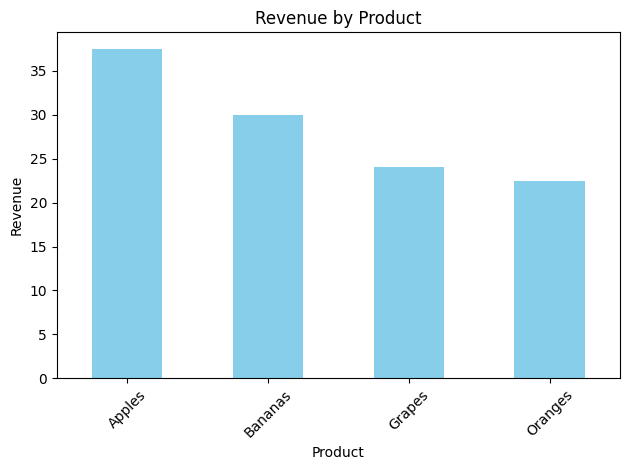

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()


cursor.execute("DROP TABLE IF EXISTS sales;")
cursor.execute("""
    CREATE TABLE sales (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        product TEXT,
        quantity INTEGER,
        price REAL
    )
""")

sample_data = [
    ("Apples", 10, 2.5),
    ("Bananas", 20, 1.0),
    ("Oranges", 15, 1.5),
    ("Apples", 5, 2.5),
    ("Bananas", 10, 1.0),
    ("Grapes", 8, 3.0)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()


query = """
SELECT product, 
       SUM(quantity) AS total_qty, 
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""
df = pd.read_sql_query(query, conn)


print("Sales Summary:")
print(df)


plt.figure(figsize=(6,4))
df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.title("Revenue by Product")
plt.ylabel("Revenue")
plt.xlabel("Product")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("sales_chart.png")  
plt.show()


conn.close()
